# Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

### 1.  Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
adult_data_raw = pd.read_csv('adult.csv')
adult_data_raw.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2.  Проведите первичный анализ.

In [3]:
adult_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 3. Проверьте данные на пропуски. Удалите в случае обнаружения.

In [4]:
adult_data_raw['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [5]:
adult_data_raw['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Обнаружены значения "?".
Замена значений "?" на None

In [6]:
adult_data_raw.replace(['?'], [None], inplace=True)

In [7]:
adult_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Доля пропусков каждого признака в данных.

In [8]:
(adult_data_raw.isna().mean() * 100).round(2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

В данных обнаружено достаточно пропусков.
Удаление строк с пропусками.

In [10]:
adult_data = adult_data_raw.dropna()
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [11]:
n = pd.read_csv('adult.csv').shape[0] - adult_data.shape[0]
p = round(n * 100 / adult_data.shape[0], 3)
print(f'Было удалено {n} строк. Это {p}% от исходных данных.')

Было удалено 3620 строк. Это 8.005% от исходных данных.


### 4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

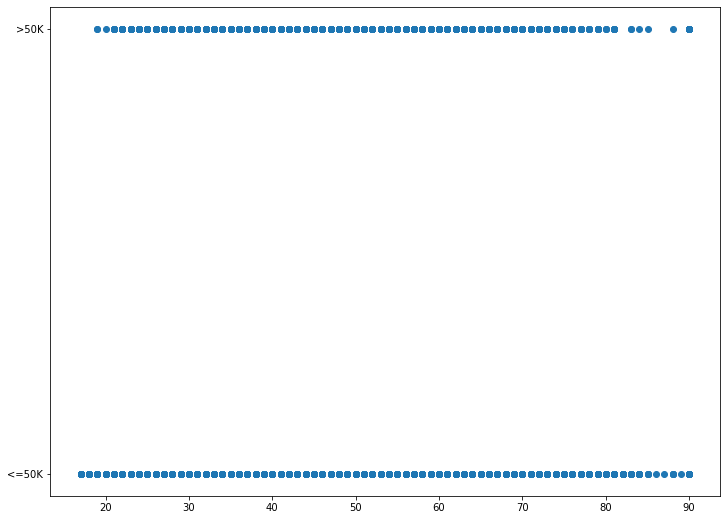

In [12]:
X = adult_data[['age']]
Y = adult_data['income']
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o')

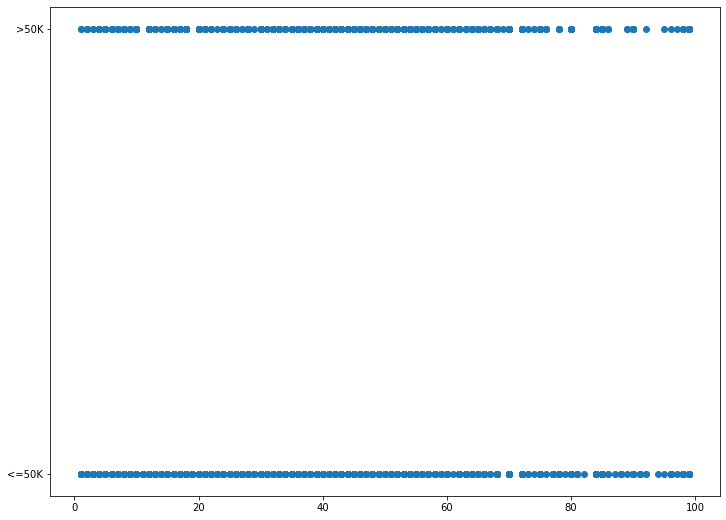

In [30]:
X = adult_data[['hours-per-week']]
Y = adult_data['income']
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o')

### 5. Преобразуйте категориальные признаки.

In [18]:
 catigorical_attribute = [
     'workclass',
     'education',
     'marital-status',
     'occupation',
     'relationship',
     'race',
     'gender',
     'native-country'
 ]

In [19]:
selected_columns = adult_data.drop('income', axis = 1)
selected_columns.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [21]:
X = pd.get_dummies(selected_columns, columns=catigorical_attribute)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Целевая переменная (столбец income)  является категориальной 

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
le.fit(adult_data['income'])

LabelEncoder()

In [24]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

Записываем в таргетную переменную y преобразованный столбец income

In [26]:
y = pd.Series(data=le.transform(adult_data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

### 6.  Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.  Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
### 8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

##### Модель логистической регрессии.

In [36]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

Обучаем на части датасета (train)

In [31]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Получаем массив

In [32]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
model.predict_proba(X_test)

array([[0.99826206, 0.00173794],
       [0.93456987, 0.06543013],
       [0.57093291, 0.42906709],
       ...,
       [0.78730114, 0.21269886],
       [0.83177089, 0.16822911],
       [0.99187287, 0.00812713]])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [34]:
model.score(X_train, y_train) 

0.8485778256903558

In [35]:
model.score(X_test,y_test)

0.8509673852957435

##### Модель опорных векторов.

In [37]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Снова получаем наш скор, для обучающей и тестовой выборок.

In [38]:
clf.score(X_train, y_train) 

0.8586118251928021

In [39]:
clf.score(X_test, y_test)

0.8512990602542841

Без StandardScaler получаем более худший результат для предсказанных данных:

In [40]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [41]:
svc.score(X_train, y_train)

0.9548055394311302

In [42]:
svc.score(X_test, y_test)

0.7548922056384743

### Выводы.

В работе мною были выполнены следующие шаги:
- Загрузка данных в рабочую среду.
- Первичный анализ.
- Проверка на пропуски. Удаление пропусков.
- 2 графика на выбор. 
 *при визуализации даннных мне не удалось сделать вывод об особенностях признаков. Не совсем понял как в этом случае действовать...
- Преобразование категориальных признаков.
- Разделение выборки на обучающее и тестовое подмножество (80-20).
- Обучение моделей логистической регрессии и опорных векторов на обучающем множестве.
- Предсказание уровеня дохода и сравнение его с истинным значением.
- Посчет точности предсказания моделей с помощью встроенной функции score.

Так как мне не удалось с помощью визуализации выбрать признаки для построения модели, я решил использовать все данные.
Модель опорных векторов показала себя немного точнее, но на много ресурсозатратнее. Очевидно необходимо провести более детальный анализ признаков для построения моделей.